1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.
3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [7]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()
df['year'] = df['hour_beginning'].dt.year
df['hour'] = df['hour_beginning'].dt.hour

C:\Users\ferdi\AppData\Local\Temp\ipykernel_17772\3523926928.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='day_of_week'>

Text(0.5, 1.0, 'Average Pedestrian Counts by Weekday (All Locations)')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Average Pedestrian Count')

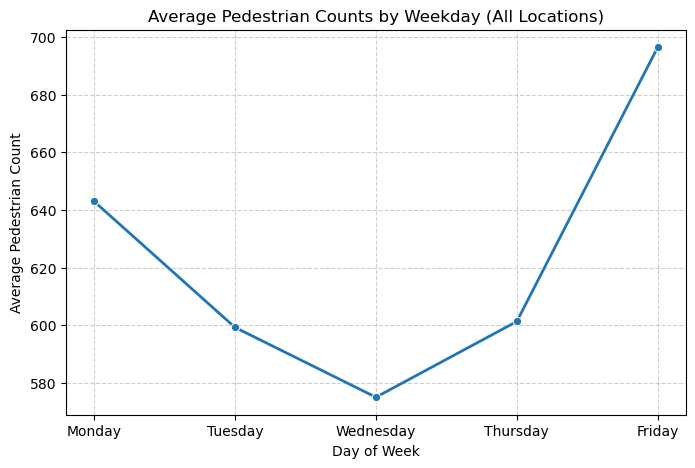

In [ ]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekday_df = df[df['day_of_week'].isin(weekdays)]

weekday_avg = weekday_df.groupby('day_of_week')['Pedestrians'].mean().reindex(weekdays)

plt.figure(figsize=(8,5))
sns.lineplot(x=weekday_avg.index, y=weekday_avg.values, marker='o', linewidth=2)
plt.title('Average Pedestrian Counts by Weekday (All Locations)')
plt.xlabel('Day of Week')
plt.ylabel('Average Pedestrian Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  543.225041
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.765922
clear-night              33.233871
Name: Pedestrians, dtype: float64


<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation between Weather & Pedestrian Counts (Brooklyn Bridge, 2019)')

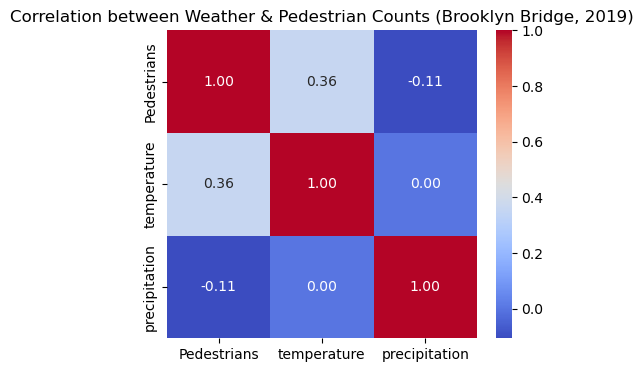

In [ ]:
brooklyn_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['year'] == 2019)].dropna(subset=['weather_summary'])

weather_summary = brooklyn_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values(ascending=False)
print(weather_summary)

corr = brooklyn_2019[['Pedestrians', 'temperature', 'precipitation']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Weather & Pedestrian Counts (Brooklyn Bridge, 2019)')
plt.show()


<Figure size 700x500 with 0 Axes>

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day (All Locations)')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

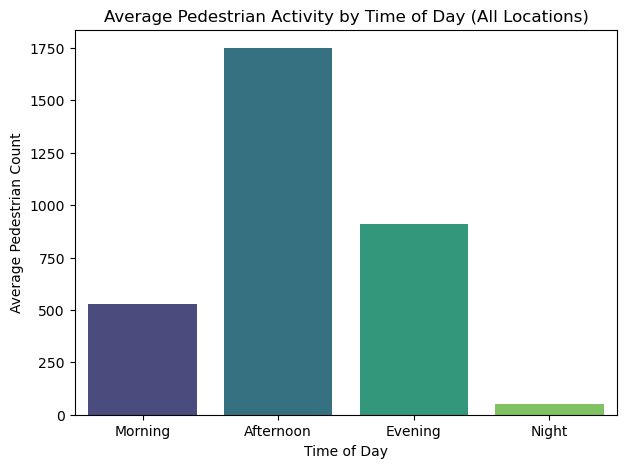

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df['time_of_day'] = df['hour'].apply(categorize_time)

tod_avg = df.groupby('time_of_day')['Pedestrians'].mean().reindex(['Morning','Afternoon','Evening','Night'])

plt.figure(figsize=(7,5))
sns.barplot(x=tod_avg.index, y=tod_avg.values, palette='viridis')
plt.title('Average Pedestrian Activity by Time of Day (All Locations)')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.show()
